In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
read_file = pd.read_csv("/home/rukayat/Documents/my csv files/train.csv")
read_file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
read_file.columns #this displays the names of each column

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The infomation of each column:

PassengerId -- A numerical id assigned to each passenger.
Survived -- Whether the passenger survived (1), or didn't (0).
Pclass -- The class the passenger was in.
Name -- the name of the passenger.
Sex -- The gender of the passenger -- male or female.
Age -- The age of the passenger. Fractional.
SibSp -- The number of siblings and spouses the passenger had on board.
Parch -- The number of parents and children the passenger had on board.
Ticket -- The ticket number of the passenger.
Fare -- How much the passenger paid for the ticket.
Cabin -- Which cabin the passenger was in.
Embarked -- Where the passenger boarded the Titanic.

In [28]:
read_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The above result shows that there are Nan values( Not a number) which needs to be removed in this case.

In [29]:
cols = ["Survived","Pclass", "Sex", "Age", "SibSp", "Parch","Fare", "Embarked"]
titanic = read_file[cols].dropna()

In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


After the Nan values had been dropped. We are left with 712 rows. In order to make the analysis easier, some columns were filtered out.

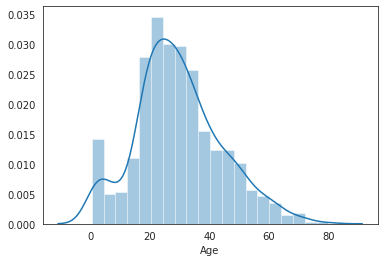

In [31]:
sns.distplot(titanic['Age'])
plt.show()

The Age column was plotted above to view the distribution of the age.

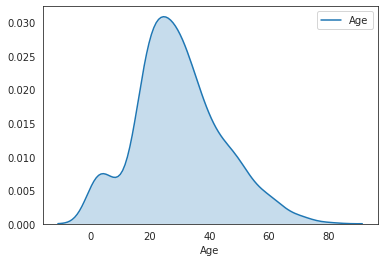

In [32]:
sns.kdeplot(titanic["Age"], shade=True)
plt.xlabel("Age")
plt.show()

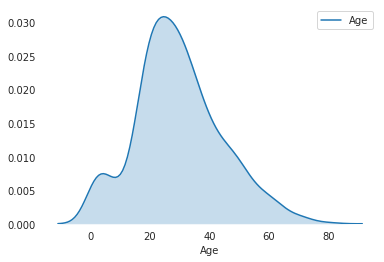

In [33]:
sns.set_style("white")
sns.kdeplot(titanic["Age"], shade=True)
plt.xlabel("Age")
sns.despine(left=True, bottom=True)
plt.show()


/home/rukayat/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


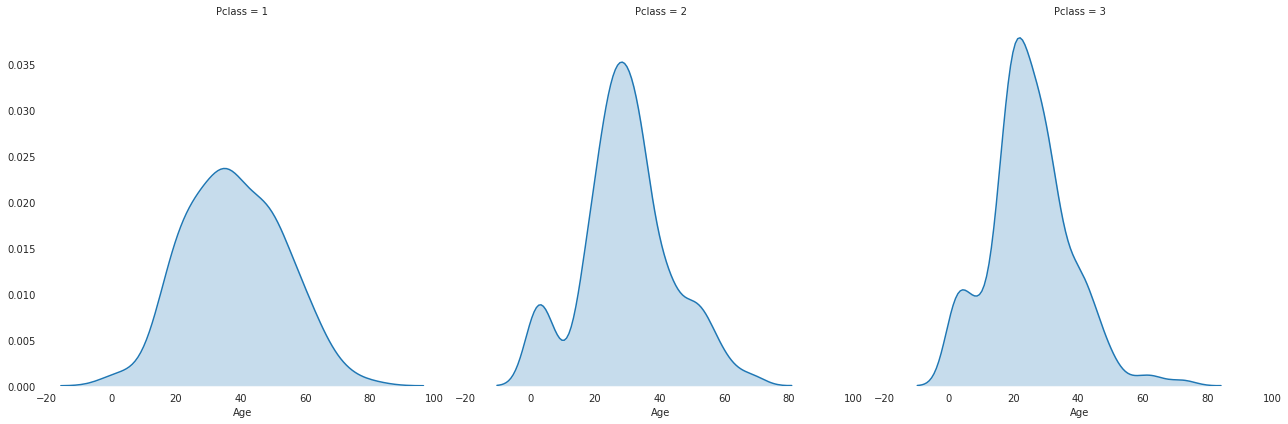

In [34]:
g = sns.FacetGrid(titanic, col="Pclass", size=6)
g.map(sns.kdeplot, "Age", shade=True)

sns.despine(bottom=True, left=True)

plt.show()

The above plot shows the class of the passengers in respect to their ages.

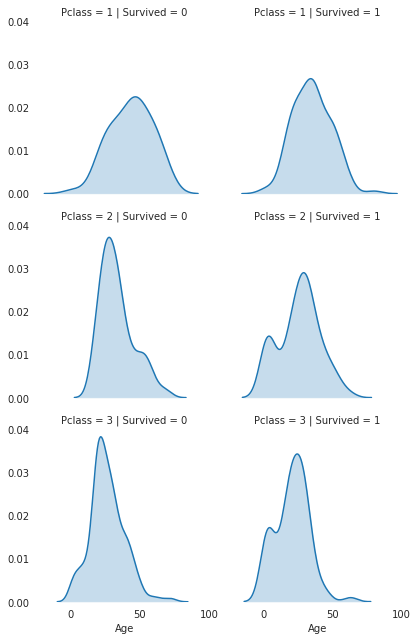

In [35]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

The plot shows the ages of the passengers in respect to their ages and their survival(1 for survived ,0 for dead)

/home/rukayat/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


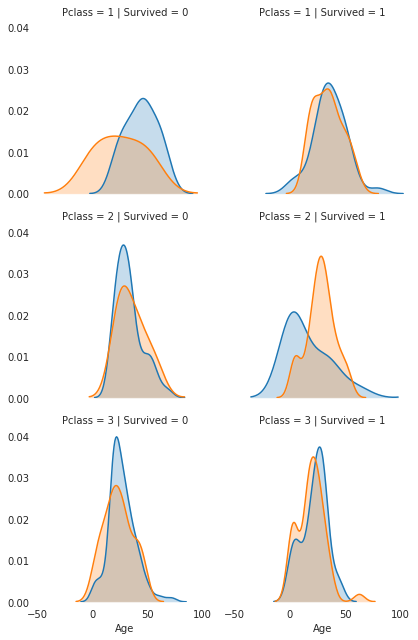

In [36]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", size=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

/home/rukayat/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


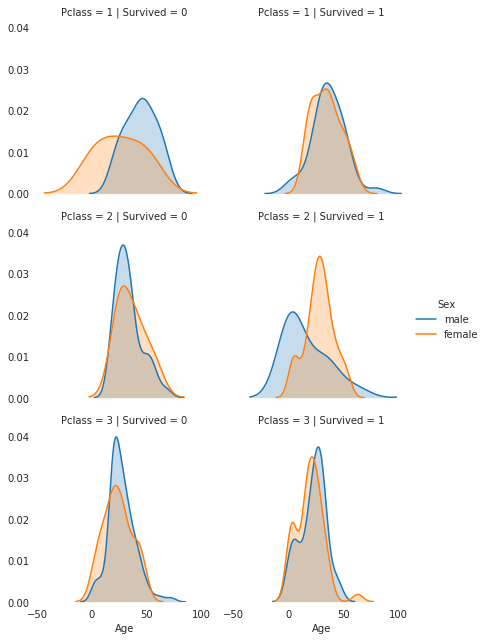

In [37]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", size=3)
g.map(sns.kdeplot, "Age", shade=True)
g.add_legend()
sns.despine(left=True, bottom=True)
plt.show()

This is the final report of the dataset and it shows the relationship between the male and female passengers in relation to their ages and their survival status on the ship.
We can deduce that from the graph above, about 40% of the female on board died during the crash and 45% of the male counterpart did not make it back home.